# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [95]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import Household


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

Explain the Code

In the following, we illustrate how the relative hours worked by women at home compared to men's change as $\alpha$ and $\sigma$ are varied. 

For the code to function, we have altered line 57 in the Household.py file, such at it not only decribes the case where the $\sigma$=1. But, also the $\sigma$=0 and neither 1 nor 0.

c:\Users\Louise Boe Prahl\Desktop\Python\projects-2023-agnete_louise_mathilde\inauguralproject\Household.py:70: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**(power)+par.alpha*HF**(power))**(1/power)


with an alpha = 0.25 and a sigma = 0.5, we get that HF/HM = 3.00 / 5.50 = 0.55
with an alpha = 0.25 and a sigma = 1.0, we get that HF/HM = 2.00 / 6.50 = 0.31
with an alpha = 0.25 and a sigma = 1.5, we get that HF/HM = 1.50 / 7.00 = 0.21
with an alpha = 0.5 and a sigma = 0.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.0, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.75 and a sigma = 0.5, we get that HF/HM = 5.50 / 3.00 = 1.83
with an alpha = 0.75 and a sigma = 1.0, we get that HF/HM = 6.50 / 2.00 = 3.25
with an alpha = 0.75 and a sigma = 1.5, we get that HF/HM = 7.00 / 1.50 = 4.67


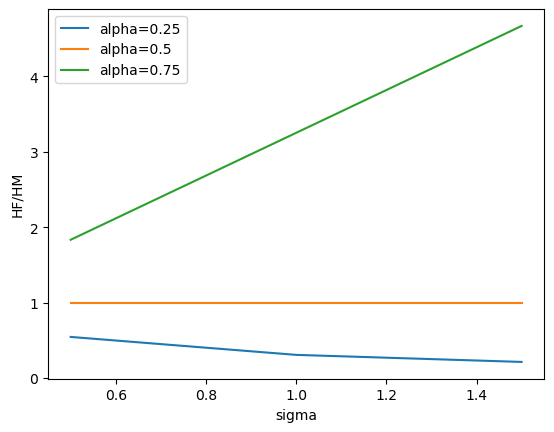

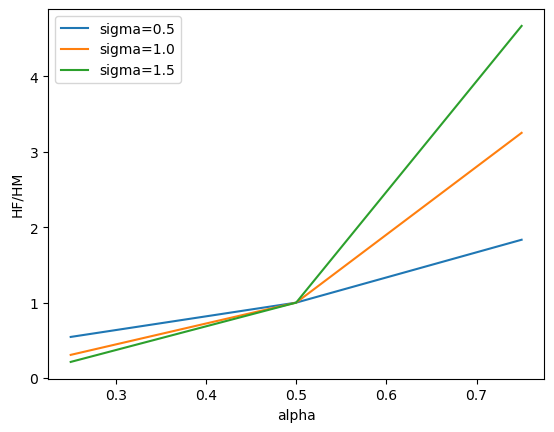

In [96]:
# 1. Call the function Q1_plot defined in inauguralproject.py
import inauguralproject as ina1

# 2. define the values of alpha and sigma to be used
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# 3. call the function
resultsHF, resultsHM, resultsHFHNM = ina1.Q_1plot(alpha_list, sigma_list)


## Interpretation of results in Question 1
The parameter $\alpha$ pertains to the productivity in the home production for females relative to males, $\frac{\alpha}{1-\alpha}$. Call this ratio $\xi$. For the given values of $\alpha$, the productivity in the home production is:
-  $\xi_{\alpha=0.25}=0.25/0.75=0.33$
-  $\xi_{\alpha=0.5}=0.5/0.5=1$
-  $\xi_{\alpha=0.75}=0.75/0.25=3$

For a given elasticity of substition, $\sigma$, the productivity in home production increases as $\alpha$ increases. $\alpha$ illustrates how much home work of women weighs in the total consumption of home production. As the productivity in home production increases in $\alpha$, i.e. when work of women weighs more than work of men, women work more productively at home relative to men. 


For $\alpha$ > 0.5 the return from women working at home is larger than the return from men doing so, and vice versa when $\alpha$ < 0.5. When $\alpha$ = 0.5, the return on home production is the same for men and women. 
In the case where $\alpha $ > 0.5, women will take on a relatively larger part of the home work, as the elasticity of substitution, $\sigma$, increases. Similarly for $\alpha $ < 0.5, men take on a larger part of the home work. 


The elasticity of substitution, $\sigma$, does not affect the ratio of house work of women to house work of men when, so long as the return on women's and men's home work is the same, i.e. $\alpha$ = 0.5.

# Question 2

## Explain the code.

In the following we will remake the plot from Question 2 only with a continuous choice set, i.e. $L_M, L_F, H_M, H_F \in [0,24]$.

The wages for females are [0.8 0.9 1.  1.1 1.2]
The ratio resulting from the different wages is [1.25 1.   1.   0.89 0.8 ]


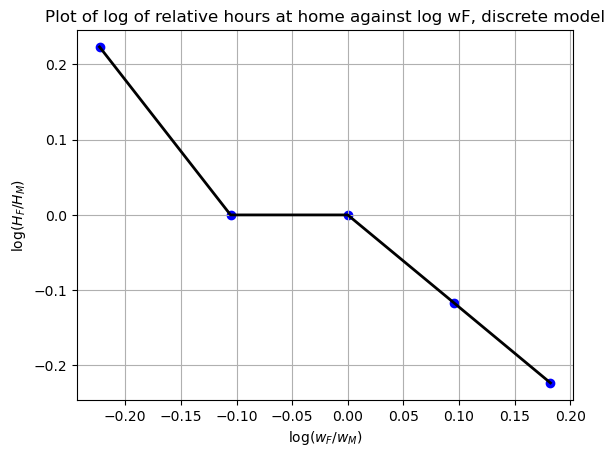

In [97]:
# 1. Create an instance of the HouseholdSpecializationModelClass
model_2 = HouseholdSpecializationModelClass()
# unpack the parameters
par = model_2.par
par.alpha = 0.5
par.sigma = 1.0

# 2. Define the vector of wage rates
wf = model_2.par.wF_vec
print(f"The wages for females are {wf}")
           
# 3. Create an empty array to store the optimal labor supply
final_ratio= np.zeros_like(wf)

# 4. Loop over the wage rates and find the optimal labor supply
for i, wage in enumerate(wf):
    model_2.par.wF = wage
    opt = model_2.solve_discrete()
    ratio = opt.HF/opt.HM
    final_ratio[i]=ratio
    #format final_ratio to 2 decimals
    final_ratio = np.round(final_ratio, 2)

# 5. Print or plot the results
print(f"The ratio resulting from the different wages is {final_ratio}")
   
# 6. create figure
fig = plt.figure()

# 7. create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(wf), np.log(final_ratio), color='black', lw=2)
ax.scatter(np.log(wf), np.log(final_ratio), color='blue')

# 8. alterations to figure
ax.grid(True)
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log wF, discrete model")

plt.show()

## Interpretation of Question 2

The lower the wages of females are, the lower the logarithmic relative wages between women and men are and the higher the logarithmic relative home work between women and men are. 

As the wages of women increase, the relative wages increase and the hours spent working at home for women drecrease relatively to men. When $w_F=1$, men and women spend the same amount of hours working at home. When men and women earn the same wage, neither men or women have a comparative advantage in working at home or in the market.

Further, when woman make 0.9 the men and woman work the same amount of ours in home production. This is an unintutive result, which probably stems from the discrete modelling framwork. 

# Question 3

Repeat the above with a continoues choice set. 

We use the module "from scipy import optimize" in the continous solution. 

In [98]:
# 1. Create an instance of the HouseholdSpecializationModelClass
model_3 = HouseholdSpecializationModelClass()
par = model_3.par
sol = model_3.sol


In [99]:
# 2. initialize vectors to store the results
sol.HF_vec = np.zeros_like(par.wF_vec)
sol.HM_vec = np.zeros_like(par.wF_vec)

# 3. making the relative wage vector for both the plot and the loop

# relative log wage vector
relative_wage = np.log(par.wF_vec)

# initialize vector to store the ratio of hours worked
lnratio = np.zeros_like(relative_wage)

# unpack the wage vector
wf = model_3.par.wF_vec

# print the wages
print(wf)

[0.8 0.9 1.  1.1 1.2]


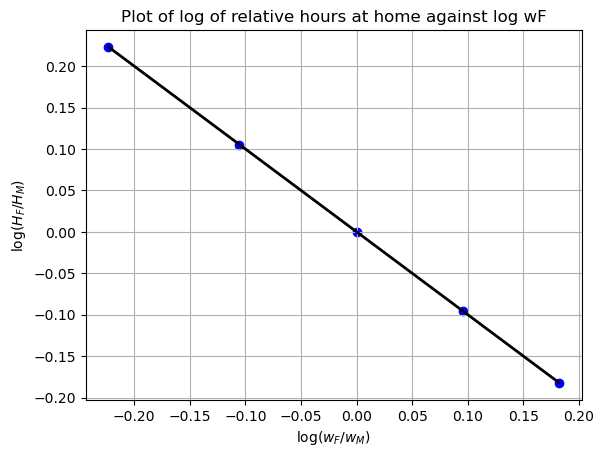

In [100]:
# 4. Defining the nessesary code for the optimization problem
# bounds on the hours worked
bounds = ((0, 24), (0, 24), (0, 24), (0, 24))

# contraints on the hours worked
def cons(x):
    return [x[0] + x[1] - 24, x[2] + x[3] - 24]

# initial guess for the hours worked
initial_guess = [4, 4, 4, 4]  

# constraints on the hours worked
constraints = {'type': 'ineq', 'fun': cons}


# 5. For each value of wF, solve the model and store the result
for i, wage in enumerate(wf):
    model_3.par.wF = wage  
    obj = lambda x: -model_3.calc_utility(x[0], x[1], x[2], x[3]) 
    solution = optimize.minimize(obj, initial_guess, method="SLSQP", bounds=bounds, constraints=constraints, tol=0)
    # if solution.success:
    sol.HM_vec[i] = solution.x[1]
    sol.HF_vec[i] = solution.x[3]
    # store the ratio of hours worked
    lnratio[i] = np.log(solution.x[3]/solution.x[1])

# 6. create figure
fig = plt.figure()

# 7. create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wage, lnratio, color='black', lw=2)
ax.scatter(relative_wage, lnratio, color='blue')

# 8. alterations to figure
ax.grid(True)
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log wF")

plt.show()

# Interpretation of Q3
The interpretation is identical to the one in Q2 only now we do not have the unintuitive "flat spot", between the $w_f = 0.9$ and $w_f = 1$.

# Alternative solution to Q3

[0.8 0.9 1.  1.1 1.2]
The ratio resulting from the different wages is [1. 1. 1. 1. 1.]


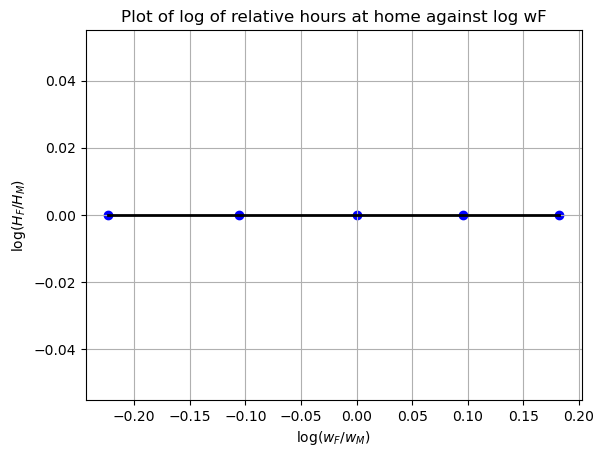

In [118]:
from scipy.optimize import minimize
model_3 = HouseholdSpecializationModelClass()

# unpack the wage vector
wf_3 = model_3.par.wF_vec
print(wf_3)
# relative log wage vector
relative_wagee = np.log(par.wF_vec)

# Creating empty lists
sol.HF_vec = np.zeros_like(par.wF_vec)
sol.HM_vec = np.zeros_like(par.wF_vec)
final3_ratio = np.zeros_like(par.wF_vec)

# For each value of wF, solve the model and store the result
for i, wage in enumerate(model_3.par.wF_vec):
    model_3.par.wF_vec = wage
    optimal = model_3.solve_continuous()
    ratio3 = optimal.HF/optimal.HM
    final3_ratio[i]=ratio3
    #format final_ratio to 2 decimals
    final3_ratio = np.round(final3_ratio, 2)

print(f"The ratio resulting from the different wages is {final3_ratio}")


# for w in wff :
#     model_3 = HouseholdSpecializationModelClass()
#     model_3.par.wF = w #Inserting wF value in model
#     opt_3 = model_3.solve_continuous() # Solving model
#     # store the ratio of hours worked
#     sol.HF_vec[i] = opt_3.HF
#     sol.HM_vec[i] = opt_3.HM   
#     # calculate the ratio of hours worked
#     ratioo = opt_3.HF/opt_3.HM
#     lnratioo[i] = np.log(ratioo)

# Make the plot of the results

# 6. create figure
fig = plt.figure()

# 7. create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(relative_wagee, np.log(final3_ratio), color='black', lw=2)
ax.scatter(relative_wagee, np.log(final3_ratio), color='blue')

# 8. alterations to figure
ax.grid(True)
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log wF")

plt.show()

# Question 4

$Log(H_F/H_M) = \beta_0 + \beta_1 Log(w_F/w_M)$

We solve this with the discrete model. 

In the following code the expression: $(\beta_0 - (\beta\hat)_0)^2+(\beta_1 - (\beta\hat)_1)^2$ is minimized by checking different values of $\sigma$ and $\alpha$.

The values of $\sigma$ and $\alpha$, $\beta_0$ and $\beta_1$, and the value of $(\beta_0 - (\beta\hat)_0)^2+(\beta_1 - (\beta\hat)_1)^2$ is reported each time a new combination of $\sigma$ and $\alpha$ results in a smaller value of $(\beta_0 - (\beta\hat)_0)^2+(\beta_1 - (\beta\hat)_1)^2$. 

In [124]:
model_4 = HouseholdSpecializationModelClass()

# Defining the objective funciton to be minimized in the optimization problem
def solve_4(x):
    
    # Setting values to alpha and sigma in the model
    model_4.par.alpha = x[0]
    model_4.par.sigma = x[1]
    
    # Solving the model
    model_4.solve_wF_vec()  

    # Calculating the error
    model_4.run_regression()
    
    # Returning the error
    return (abs((model_4.par.beta0_target-model_4.sol.beta0)**2+(model_4.par.beta1_target-model_4.sol.beta1)**2))

# Setting bounds for alpha and sigma
bounds = [(0, 1), (0, 10)] 
# Creating initial guess
initial_guess = [0.5,1] 

# Use a minimize function to find the optimal values of alpha and sigma
result = optimize.minimize(solve_4, initial_guess, 
                           bounds=bounds, method = "Nelder-Mead") 

lnratio4 = np.log(model_4.sol.HF_vec/model_4.sol.HM_vec) # Creating ratio vector

# Printing solution
print(f"Optimal values: alpha = {result.x[0]:.3f}, sigma = {result.x[1]:.3f}")
print('\n' "And the ratios for each wage are:")
print(lnratio4)


c:\Users\Louise Boe Prahl\Desktop\Python\projects-2023-agnete_louise_mathilde\inauguralproject\Household.py:70: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**(power)+par.alpha*HF**(power))**(1/power)


Optimal values: alpha = 0.988, sigma = 0.091

And the ratios for each wage are:
[0.42114308 0.41156672 0.40341011 0.38495355 0.38383719]


The optimal value of $\alpha$ is $0.988$. Meaning that the females are the more productive in home production. 
And, as we found in Q1, when $\alpha $ > 0.5, women will take on a relatively larger part of the home work, as the elasticity of substitution, $\sigma$, increases.

The optiml value of $\sigma$ is $0.091$, meaning that elastiicy of substitution is relativly small.  

# Question 5

In this part of the assigment we suggest and implement an extension of the model, and analyze whether this makes the model match data better, when  $\alpha = 0.5$.

The specific extention we test is the inclusion of an extra term in the disutility from working; specifically $\epsilon$


In [126]:
model_5 = HouseholdSpecializationModelClass()

# Defining the objective funciton to be minimized in the optimization problem
def solve_5(x):
    
    # Setting values to alpha and sigma in the model
    model_5.par.alpha = 0.5
    model_5.par.sigma = x[0]
    
    # Solving the model
    model_5.solve_wF_vec()  

    # Calculating the error
    model_5.run_regression()
    
    # Returning the error
    return (abs((model_5.par.beta0_target-model_5.sol.beta0)**2+(model_5.par.beta1_target-model_5.sol.beta1)**2))

# Setting bounds for sigma
bounds = [(0, 10)] 
# Creating initial guess
initial_guess = [1] 

# Use a minimize function to find the optimal values of alpha and sigma
result = optimize.minimize(solve_5, initial_guess, 
                           bounds=bounds, method = "Nelder-Mead") 

lnratio4 = np.log(model_5.sol.HF_vec/model_5.sol.HM_vec) # Creating ratio vector

# Printing solution
print(f"Optimal value of sigma = {result.x[1]:.3f}")
print('\n' "And the ratios for each wage are:")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Louise Boe Prahl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Louise Boe Prahl\AppData\Local\Temp\ipykernel_5416\3456818774.py", line 25, in <module>
    result = optimize.minimize(solve_5, initial_guess,
  File "c:\Users\Louise Boe Prahl\anaconda3\lib\site-packages\scipy\optimize\_minimize.py", line 687, in minimize
    res = _minimize_neldermead(fun, x0, args, callback, bounds=bounds,
  File "c:\Users\Louise Boe Prahl\anaconda3\lib\site-packages\scipy\optimize\_optimize.py", line 797, in _minimize_neldermead
    fxr = func(xr)
  File "c:\Users\Louise Boe Prahl\anaconda3\lib\site-packages\scipy\optimize\_optimize.py", line 496, in function_wrapper
    fx = function(np.copy(x), *(wrapper_args + args))
  File "C:\Users\Louise Boe Prahl\AppData\Local\Temp\ipykernel_5416\3456818774.py", line 11, in solve_5
    model_5.solve_wF_

# Question 4 - alternative, less efficient code

The following code takes too long to run. 

In [ ]:
# 1. Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# 2. Define the vector of wage rates
wf = model.par.wF_vec
print(f"The wages for females are {wf}")
        
# 3. Create an empty array to store the optimal labor supply
temp_ratio= np.zeros_like(wf)
temp_beta0= np.zeros_like(wf)
temp_beta1= np.zeros_like(wf)

# Define the alpha and sigma lists
alpha_list = np.linspace(0.1, 1,10)
sigma_list = np.linspace(0.1, 1,10)

temp_beta_sol =10
temp_alpha_opt=0
temp_sigma_opt=0
beta0=0
beta1=0

# 4. Loop over the wage rates and find the optimal labor supply
for alpha in alpha_list:    
    for sigma in sigma_list:
        for i, wage in enumerate(wf): #Creates HF_vec and HM_vec for run_regression() function
            model.par.wF = wage
            model.par.alpha = alpha
            model.par.sigma = sigma
            opt = model.solve_discrete()
            model.sol.HF_vec[i]=opt.HF
            model.sol.HM_vec[i]=opt.HM
            ratio = opt.HF/opt.HM
            temp_ratio[i]=ratio
            # 5. Print or plot the results
        
        model.run_regression()
        if abs((model.par.beta0_target-model.sol.beta0)**2+(model.par.beta1_target-model.sol.beta1)**2 < temp_beta_sol):
            temp_beta_sol=abs(model.par.beta0_target-model.sol.beta0)**2+(model.par.beta1_target-model.sol.beta1)**2
            temp_alpha_opt=alpha
            temp_sigma_opt=sigma
            beta0=model.sol.beta0
            beta1=model.sol.beta1
            print("updated")
            print(f"sigma= {temp_sigma_opt}, alpha= {temp_alpha_opt}, beta0={beta0}, beta1={beta1} temp_beta_sol= {temp_beta_sol}")

# model.run_regression()
# print(model.sol.beta1)
# print(model.sol.beta0)
# print(f"sigma= {temp_sigma_opt}, alpha= {temp_alpha_opt} temp_beta_sol= {temp_beta_sol}")

The wages for females are [0.8 0.9 1.  1.1 1.2]


c:\Users\Louise Boe Prahl\Desktop\Python\projects-2023-agnete_louise_mathilde\inauguralproject\Household.py:70: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**(power)+par.alpha*HF**(power))**(1/power)


updated
sigma= 0.1, alpha= 0.1, beta0=-0.22314355131420965, beta1=-2.199370101392506e-16 temp_beta_sol= 0.39830788554448493
updated
sigma= 0.1, alpha= 0.2, beta0=-0.11556062818108573, beta1=-0.02576022392605501 temp_beta_sol= 0.2713143056819852
updated
sigma= 0.1, alpha= 0.30000000000000004, beta0=-0.11319326762846346, beta1=-0.037273697579470993 temp_beta_sol= 0.2673019189545314
updated
sigma= 0.1, alpha= 0.4, beta0=0.0, beta1=0.0 temp_beta_sol= 0.17000000000000004
updated
sigma= 0.30000000000000004, alpha= 0.5, beta0=0.018849154408797853, beta1=-0.21848308367589253 temp_beta_sol= 0.159314208212237
updated
sigma= 0.2, alpha= 0.6, beta0=0.08739050666601794, beta1=-0.18349010610973188 temp_beta_sol= 0.10469529314074327
updated
sigma= 0.4, alpha= 0.6, beta0=0.1778890544365636, beta1=-0.3056957084199269 temp_beta_sol= 0.09164399660145939
updated
sigma= 0.30000000000000004, alpha= 0.7000000000000001, beta0=0.24019468555216708, beta1=-0.19764199006941577 temp_beta_sol= 0.03507169675048665
u

c:\Users\Louise Boe Prahl\Desktop\Python\projects-2023-agnete_louise_mathilde\inauguralproject\Household.py:70: RuntimeWarning: invalid value encountered in multiply
  H = ((1-par.alpha)*HM**(power)+par.alpha*HF**(power))**(1/power)
C:\Users\Louise Boe Prahl\AppData\Local\Temp\ipykernel_5416\3784079477.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = opt.HF/opt.HM
c:\Users\Louise Boe Prahl\Desktop\Python\projects-2023-agnete_louise_mathilde\inauguralproject\Household.py:188: RuntimeWarning: divide by zero encountered in divide


The optimal $\sigma$=0.2 and the $\alpha$=0.9. 

